In [23]:
import pandas as pd
from parameter_combination import read_file
com_df = pd.read_csv("./best_20_pm.csv",
                         index_col=[0],
                         header=0)
com_df["num_phenotypes"] = 1
index = com_df.index.tolist()
sheet_name = [i for i in index]
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_list=["./Lamarck01.csv","./Lamarck23.csv","./Lamarck45.csv","./Lamarck67.csv","./Lamarck89.csv",
           "./Lamarck1011.csv","./Lamarck1213.csv","./Lamarck1415.csv","./Lamarck1617.csv","./Lamarck1819.csv"]
df = [read_csv(name) for name in path_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_multi1_rawdata.csv",header=True,index=True)

[590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594, 542, 570, 562, 575, 573, 552, 555]
Int64Index([590, 593, 579, 588, 589, 591, 576, 587, 569, 558, 592, 572, 594,
            542, 570, 562, 575, 573, 552, 555],
           dtype='int64')
                        590        593        579        588        589  \
Function Times                                                            
F1       Times1    0.000044   0.000047   0.000048   0.000047   0.000050   
         Times2    0.000044   0.000049   0.000049   0.000050   0.000033   
         Times3    0.000048   0.000050   0.000044   0.000047   0.000048   
         Times4    0.000042   0.000049   0.000045   0.000045   0.000047   
         Times5    0.000049   0.000049   0.000046   0.000035   0.000048   
...                     ...        ...        ...        ...        ...   
F23      Times6   -5.128481 -10.536312  -5.175647 -10.536274 -10.536387   
         Times7  -10.536295  -5.128480 -10.536303  -5.128481 -10.536284  

In [24]:
def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    if Function in ["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F9", "F10", "F11", "F12", "F13", "F14", "F18"]:
        dataframe = dataframe.round(1)
    elif Function in ["F17"]:
        dataframe = dataframe.round(3)
    elif Function in ["F19", "F20"]:
        dataframe = dataframe.round(2)
    elif Function in ["F8", "F15", "F16", "F21", "F22", "F23"]:
        dataframe = dataframe.round(4)

    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if x == optimal else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

In [25]:
import numpy as np
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 50, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.00030, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,
       -10.4028, -10.5363]
function_list = np.arange(1, 24, 1)
# function_list = [2, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 21, 22]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 10) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
percent_df.to_csv("./Lamarck_multi1_percent_f1_f23_1000000_50d.csv")

,590,593,579,588,589,591,576,587,569,558,592,572,594,542,570,562,575,573,552,555
Function,,,,,,,,,,,,,,,,,,,,
F1,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F2,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F3,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F4,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F5,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F6,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
F7,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F8,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
F9,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


In [26]:
import numpy as np
df = percent_df.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
df = df.applymap(lambda x: int(x)/100)
df.columns = ["col"+str(i) for i in range(1,21,1)]
print(df)

          col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  \
Function                                                                       
F1         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F2         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F3         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F4         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
F6         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F7         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
F8         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
F9         1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F10        1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    1.0    1.0   
F11        1.0   1.0   1.0   1.0   1.0  

In [27]:
import functions_parameter
genotype_range_list =[]
for i in range(1,24,1):
    func, num_genes, genotype_range = functions_parameter.choose_func(i)
    genotype_range_list.append(genotype_range)
ratio_list=[]
for i in genotype_range_list:
    low_bound, high_bound = i
    print(low_bound,high_bound)
    k = np.round(2/(high_bound-low_bound),4)
    ratio_list.append(k)
print(ratio_list)

-100 100
-100 100
-100 100
-100 100
-30 30
-100 100
-1.28 1.28
-500 500
-5.12 5.12
-32 32
-600 600
-50 50
-50 50
-65 65
-5 5
-5 5
-5 5
-2 2
1 3
0 1
0 10
0 10
0 10
[0.01, 0.01, 0.01, 0.01, 0.0333, 0.01, 0.7812, 0.002, 0.1953, 0.0312, 0.0017, 0.02, 0.02, 0.0154, 0.2, 0.2, 0.2, 0.5, 1.0, 2.0, 0.2, 0.2, 0.2]


['F1_0.01', 'F2_0.01', 'F3_0.01', 'F4_0.01', 'F5_0.0333', 'F6_0.01', 'F7_0.7812', 'F8_0.002', 'F9_0.1953', 'F10_0.0312', 'F11_0.0017', 'F12_0.02', 'F13_0.02', 'F14_0.0154', 'F15_0.2', 'F16_0.2', 'F17_0.2', 'F18_0.5', 'F19_1.0', 'F20_2.0', 'F21_0.2', 'F22_0.2', 'F23_0.2']
['F1_0.01', 'F2_0.01', 'F3_0.01', 'F4_0.01', 'F5_0.0333', 'F6_0.01', 'F7_0.7812', 'F8_0.002', 'F9_0.1953', 'F10_0.0312', 'F11_0.0017', 'F12_0.02', 'F13_0.02', 'F14_0.0154', 'F15_0.2', 'F16_0.2', 'F17_0.2', 'F18_0.5', 'F19_1.0', 'F20_2.0', 'F21_0.2', 'F22_0.2', 'F23_0.2']
['F1_0.01', 'F2_0.01', 'F3_0.01', 'F4_0.01', 'F5_0.0333', 'F6_0.01', 'F7_0.7812', 'F8_0.002', 'F9_0.1953', 'F10_0.0312', 'F11_0.0017', 'F12_0.02', 'F13_0.02', 'F14_0.0154', 'F15_0.2', 'F16_0.2', 'F17_0.2', 'F18_0.5', 'F19_1.0', 'F20_2.0', 'F21_0.2', 'F22_0.2', 'F23_0.2']
['F1_0.01', 'F2_0.01', 'F3_0.01', 'F4_0.01', 'F5_0.0333', 'F6_0.01', 'F7_0.7812', 'F8_0.002', 'F9_0.1953', 'F10_0.0312', 'F11_0.0017', 'F12_0.02', 'F13_0.02', 'F14_0.0154', 'F15_0.2', 

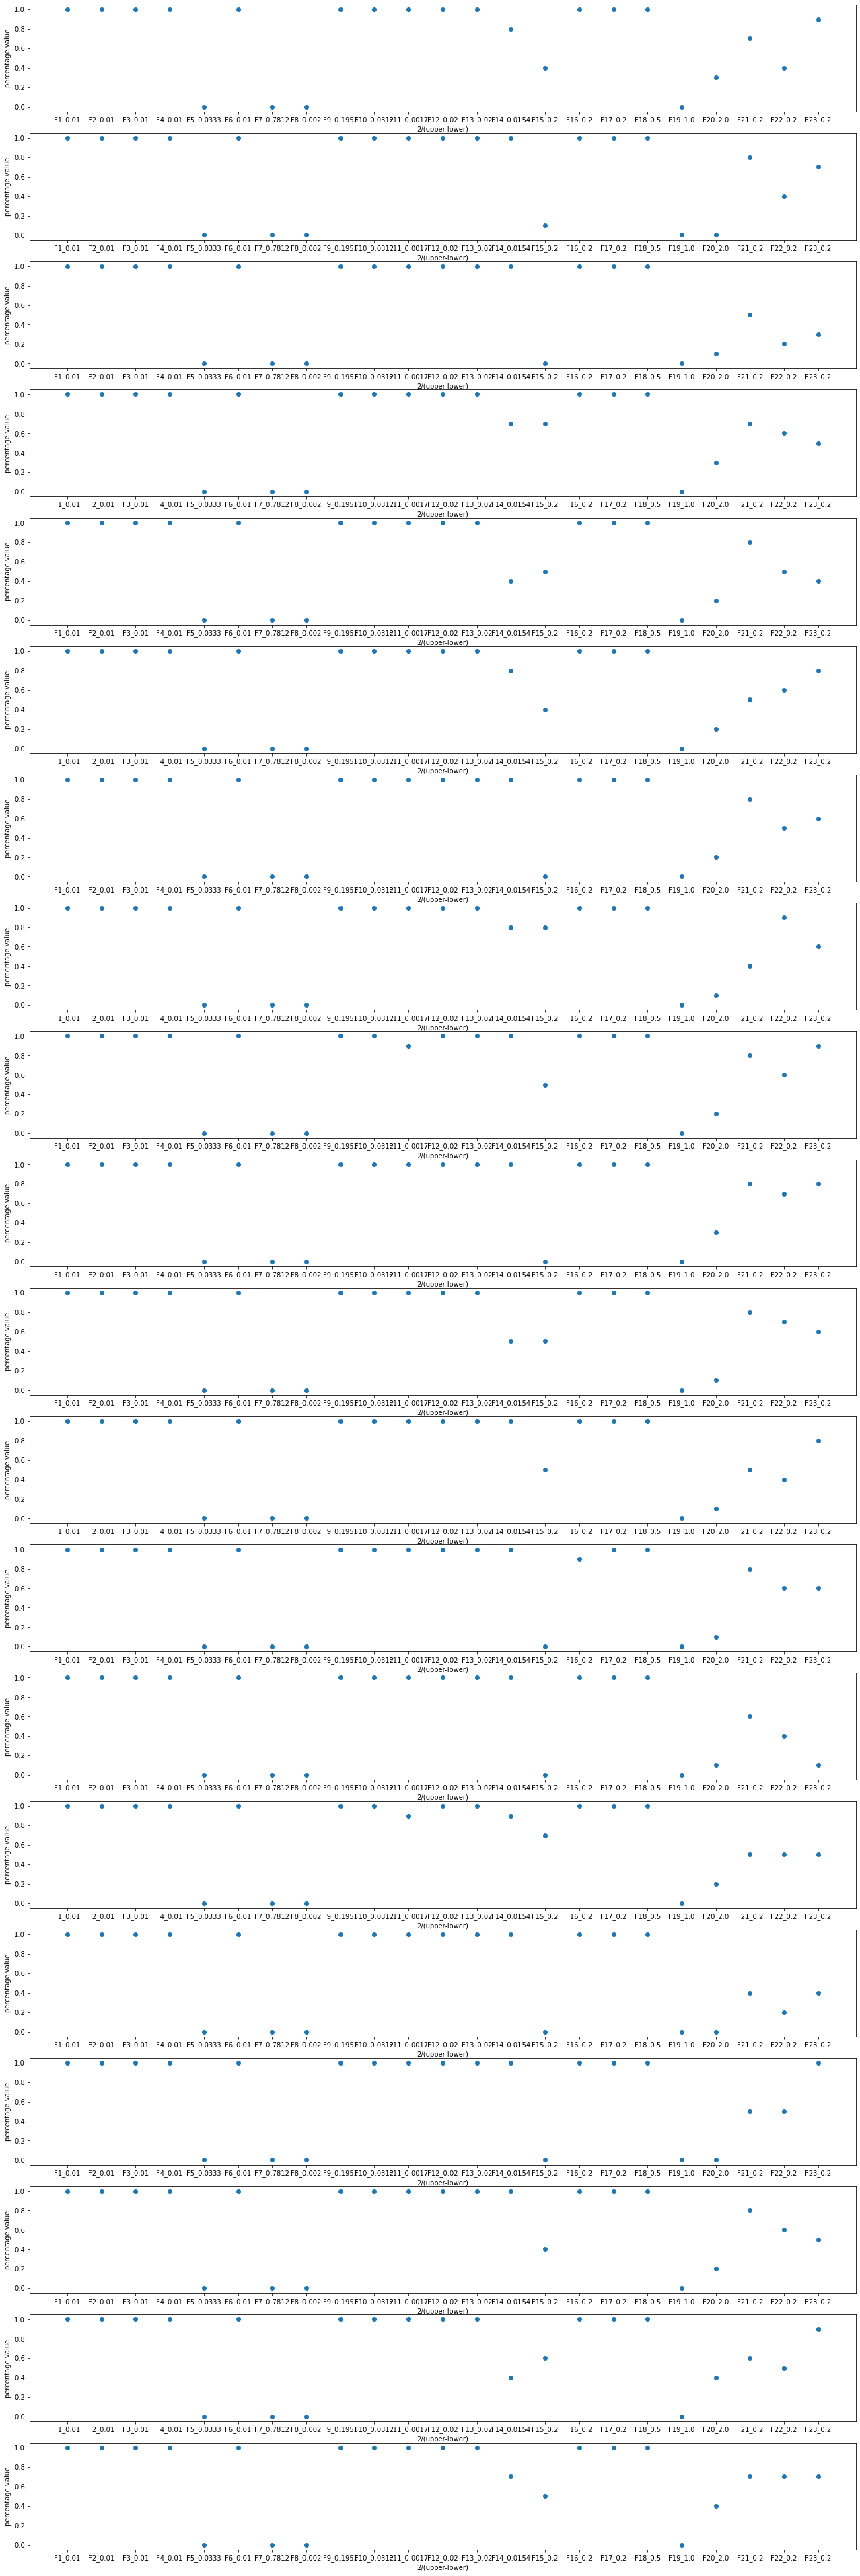

In [28]:
import matplotlib.pyplot as plt
dist_cols = 1
dist_rows = 60
plt.figure(figsize=(22 * dist_cols,3.5 * dist_rows))
for i in range(1,21,1):
    plt.subplot(dist_rows, dist_cols, i)
    x = ["F"+str(i+1)+"_"+str(ratio_list[i]) for i in range(23)]
    print(x)
    y1 = df["col"+str(i)].tolist()
    plt.scatter(x,y1)
    plt.xlabel("2/(upper-lower)")
    plt.ylabel("percentage value")
plt.savefig("./Lamarck10_N_new20.pdf", dpi=1000)
plt.show()